In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/VElectra/SA')

In [ ]:
pwd

'/content/drive/MyDrive/VElectra/SA'

In [ ]:
!nvidia-smi

Fri Mar  5 09:53:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install transformers

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.9MB 8.0MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.2MB 56.0MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 890kB 55.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=64e874c4363eaab847662aec887d0ae6f4aa86e39f061090f799a42c46f754ce
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("FPTAI/vibert-base-cased")

model = AutoModel.from_pretrained("FPTAI/vibert-base-cased")

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'st', '##uck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [13928, 7655, 923, 14897, 24840, 444, 923, 2581, 4447, 9972, 3728, 4666, 3685, 121, 28991, 6]


In [ ]:
replace_list = {
        '√≤a': 'o√†', '√≥a': 'o√°', '·ªèa': 'o·∫£', '√µa': 'o√£', '·ªça': 'o·∫°', '√≤e': 'o√®', '√≥e': 'o√©','·ªèe': 'o·∫ª',
        '√µe': 'o·∫Ω', '·ªçe': 'o·∫π', '√πy': 'u·ª≥', '√∫y': 'u√Ω', '·ªßy': 'u·ª∑', '≈©y': 'u·ªπ','·ª•y': 'u·ªµ', 'u·∫£': '·ªßa',
        'aÃâ': '·∫£', '√¥ÃÅ': '·ªë', 'u¬¥': '·ªë','√¥ÃÉ': '·ªó', '√¥ÃÄ': '·ªì', '√¥Ãâ': '·ªï', '√¢ÃÅ': '·∫•', '√¢ÃÉ': '·∫´', '√¢Ãâ': '·∫©',
        '√¢ÃÄ': '·∫ß', 'oÃâ': '·ªè', '√™ÃÄ': '·ªÅ','√™ÃÉ': '·ªÖ', 'ƒÉÃÅ': '·∫Ø', 'uÃâ': '·ªß', '√™ÃÅ': '·∫ø', '∆°Ãâ': '·ªü', 'iÃâ': '·ªâ',
        'eÃâ': '·∫ª', '√†k': u' √† ','aÀã': '√†', 'iÀã': '√¨', 'ƒÉ¬¥': '·∫Ø','∆∞Ãâ': '·ª≠', 'eÀú': '·∫Ω', 'yÀú': '·ªπ', 'a¬¥': '√°',
        #Quy c√°c icon v·ªÅ 2 lo·∫°i emoj: T√≠ch c·ª±c ho·∫∑c ti√™u c·ª±c
        "üëπ": "nagative", "üëª": "positive", "üíÉ": "positive",'ü§ô': ' positive ', 'üëç': ' positive ',
        "üíÑ": "positive", "üíé": "positive", "üí©": "positive","üòï": "nagative", "üò±": "nagative", "üò∏": "positive",
        "üòæ": "nagative", "üö´": "nagative",  "ü§¨": "nagative","üßö": "positive", "üß°": "positive",'üê∂':' positive ',
        'üëé': ' nagative ', 'üò£': ' nagative ','‚ú®': ' positive ', '‚ù£': ' positive ','‚òÄ': ' positive ',
        '‚ô•': ' positive ', 'ü§©': ' positive ', 'like': ' positive ', 'üíå': ' positive ',
        'ü§£': ' positive ', 'üñ§': ' positive ', 'ü§§': ' positive ', ':(': ' nagative ', 'üò¢': ' nagative ',
        '‚ù§': ' positive ', 'üòç': ' positive ', 'üòò': ' positive ', 'üò™': ' nagative ', 'üòä': ' positive ',
        '?': ' ? ', 'üòÅ': ' positive ', 'üíñ': ' positive ', 'üòü': ' nagative ', 'üò≠': ' nagative ',
        'üíØ': ' positive ', 'üíó': ' positive ', '‚ô°': ' positive ', 'üíú': ' positive ', 'ü§ó': ' positive ',
        '^^': ' positive ', 'üò®': ' nagative ', '‚ò∫': ' positive ', 'üíã': ' positive ', 'üëå': ' positive ',
        'üòñ': ' nagative ', 'üòÄ': ' positive ', ':((': ' nagative ', 'üò°': ' nagative ', 'üò†': ' nagative ',
        'üòí': ' nagative ', 'üôÇ': ' positive ', 'üòè': ' nagative ', 'üòù': ' positive ', 'üòÑ': ' positive ',
        'üòô': ' positive ', 'üò§': ' nagative ', 'üòé': ' positive ', 'üòÜ': ' positive ', 'üíö': ' positive ',
        '‚úå': ' positive ', 'üíï': ' positive ', 'üòû': ' nagative ', 'üòì': ' nagative ', 'Ô∏èüÜóÔ∏è': ' positive ',
        'üòâ': ' positive ', 'üòÇ': ' positive ', ':v': '  positive ', '=))': '  positive ', 'üòã': ' positive ',
        'üíì': ' positive ', 'üòê': ' nagative ', ':3': ' positive ', 'üò´': ' nagative ', 'üò•': ' nagative ',
        'üòÉ': ' positive ', 'üò¨': ' üò¨ ', 'üòå': ' üòå ', 'üíõ': ' positive ', 'ü§ù': ' positive ', 'üéà': ' positive ',
        'üòó': ' positive ', 'ü§î': ' nagative ', 'üòë': ' nagative ', 'üî•': ' nagative ', 'üôè': ' nagative ',
        'üÜó': ' positive ', 'üòª': ' positive ', 'üíô': ' positive ', 'üíü': ' positive ',
        'üòö': ' positive ', '‚ùå': ' nagative ', 'üëè': ' positive ', ';)': ' positive ', '<3': ' positive ',
        'üåù': ' positive ',  'üå∑': ' positive ', 'üå∏': ' positive ', 'üå∫': ' positive ',
        'üåº': ' positive ', 'üçì': ' positive ', 'üêÖ': ' positive ', 'üêæ': ' positive ', 'üëâ': ' positive ',
        'üíê': ' positive ', 'üíû': ' positive ', 'üí•': ' positive ', 'üí™': ' positive ',
        'üí∞': ' positive ',  'üòá': ' positive ', 'üòõ': ' positive ', 'üòú': ' positive ',
        'üôÉ': ' positive ', 'ü§ë': ' positive ', 'ü§™': ' positive ','‚òπ': ' nagative ',  'üíÄ': ' nagative ',
        'üòî': ' nagative ', 'üòß': ' nagative ', 'üò©': ' nagative ', 'üò∞': ' nagative ', 'üò≥': ' nagative ',
        'üòµ': ' nagative ', 'üò∂': ' nagative ', 'üôÅ': ' nagative ',
        #Chu·∫©n h√≥a 1 s·ªë sentiment words/English words
        ':))': '  positive ', ':)': ' positive ', '√¥ k√™i': ' ok ', 'okie': ' ok ', ' o k√™ ': ' ok ',
        'okey': ' ok ', '√¥k√™': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','ok√™':' ok ',
        ' tks ': u' c√°m ∆°n ', 'thks': u' c√°m ∆°n ', 'thanks': u' c√°m ∆°n ', 'ths': u' c√°m ∆°n ', 'thank': u' c√°m ∆°n ',
        '‚≠ê': 'star ', '*': 'star ', 'üåü': 'star ', 'üéâ': u' positive ',
        'kg ': u' kh√¥ng ','not': u' kh√¥ng ', u' kg ': u' kh√¥ng ', '"k ': u' kh√¥ng ',' kh ':u' kh√¥ng ','k√¥':u' kh√¥ng ','hok':u' kh√¥ng ',' kp ': u' kh√¥ng ph·∫£i ',u' k√¥ ': u' kh√¥ng ', '"ko ': u' kh√¥ng ', u' ko ': u' kh√¥ng ', u' k ': u' kh√¥ng ', 'khong': u' kh√¥ng ', u' hok ': u' kh√¥ng ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' nagative ',' cc ': ' nagative ','cute': u' d·ªÖ th∆∞∆°ng ','huhu': ' nagative ', ' vs ': u' v·ªõi ', 'wa': ' qu√° ', 'w√°': u' qu√°', 'j': u' g√¨ ', '‚Äú': ' ',
        ' sz ': u' c·ª° ', 'size': u' c·ª° ', u' ƒëx ': u' ƒë∆∞·ª£c ', 'dk': u' ƒë∆∞·ª£c ', 'dc': u' ƒë∆∞·ª£c ', 'ƒëk': u' ƒë∆∞·ª£c ',
        'ƒëc': u' ƒë∆∞·ª£c ','authentic': u' chu·∫©n ch√≠nh h√£ng ',u' aut ': u' chu·∫©n ch√≠nh h√£ng ', u' auth ': u' chu·∫©n ch√≠nh h√£ng ', 'thick': u' positive ', 'store': u' c·ª≠a h√†ng ',
        'shop': u' c·ª≠a h√†ng ', 'sp': u' s·∫£n ph·∫©m ', 'gud': u' t·ªët ','god': u' t·ªët ','wel done':' t·ªët ', 'good': u' t·ªët ', 'g√∫t': u' t·ªët ',
        's·∫•u': u' x·∫•u ','gut': u' t·ªët ', u' tot ': u' t·ªët ', u' nice ': u' t·ªët ', 'perfect': 'r·∫•t t·ªët', 'bt': u' b√¨nh th∆∞·ªùng ',
        'time': u' th·ªùi gian ', 'q√°': u' qu√° ', u' ship ': u' giao h√†ng ', u' m ': u' m√¨nh ', u' mik ': u' m√¨nh ',
        '√™Ãâ': '·ªÉ', 'product': 's·∫£n ph·∫©m', 'quality': 'ch·∫•t l∆∞·ª£ng','chat':' ch·∫•t ', 'excelent': 'ho√†n h·∫£o', 'bad': 't·ªá','fresh': ' t∆∞∆°i ','sad': ' t·ªá ',
        'date': u' h·∫°n s·ª≠ d·ª•ng ', 'hsd': u' h·∫°n s·ª≠ d·ª•ng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao h√†ng ',u' s√≠p ': u' giao h√†ng ',
        'beautiful': u' ƒë·∫πp tuy·ªát v·ªùi ', u' tl ': u' tr·∫£ l·ªùi ', u' r ': u' r·ªìi ', u' shopE ': u' c·ª≠a h√†ng ',u' order ': u' ƒë·∫∑t h√†ng ',
        'ch·∫•t lg': u' ch·∫•t l∆∞·ª£ng ',u' sd ': u' s·ª≠ d·ª•ng ',u' dt ': u' ƒëi·ªán tho·∫°i ',u' nt ': u' nh·∫Øn tin ',u' tl ': u' tr·∫£ l·ªùi ',u' s√†i ': u' x√†i ',u'bjo':u' bao gi·ªù ',
        'thik': u' th√≠ch ',u' sop ': u' c·ª≠a h√†ng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' r·∫•t ',u'qu·∫£ ng ':u' qu·∫£ng  ',
        'dep': u' ƒë·∫πp ',u' xau ': u' x·∫•u ','delicious': u' ngon ', u'h√†g': u' h√†ng ', u'q·ªßa': u' qu·∫£ ',
        'iu': u' y√™u ','fake': u' gi·∫£ m·∫°o ', 'trl': 'tr·∫£ l·ªùi', '><': u' positive ',
        ' por ': u' t·ªá ',' poor ': u' t·ªá ', 'ib':u' nh·∫Øn tin ', 'rep':u' tr·∫£ l·ªùi ',u'fback':' feedback ','fedback':' feedback ',
        #d∆∞·ªõi 3* quy v·ªÅ 1*, tr√™n 3* quy v·ªÅ 5*
        '6 sao': ' 5star ','6 star': ' 5star ', '5star': ' 5star ','5 sao': ' 5star ','5sao': ' 5star ',
        'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ','2 sao':' 1star ','2sao':' 1star ',
        '2 starstar':' 1star ','1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ',}

In [ ]:
import re 
import string
train_path = '/content/drive/MyDrive/Bert/Sentiment analysis/train.crash'
test_path = '/content/drive/MyDrive/Bert/Sentiment analysis/test.crash'
train_id, train_text, train_mask, train_label = [], [], [], []
test_id,test_text,test_mask,test_label = [],[],[],[]
with open(train_path,'r') as f_r:
  data = f_r.read().strip()
  data = re.findall('train_[\s\S]+?\"\n[01]\n\n', data)
  for sample in data:
    splits = sample.strip().split('\n')
    id = splits[0]
    label = int(splits[-1])
    text = ' '.join(splits[1:-1])[1:-1]
    text = text.lower()
    text = ' '.join(text.split())
    translator = str.maketrans(string.punctuation,' '*len(string.punctuation))
    text = text.translate(translator)
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE) #remove c√°c k√≠ t·ª± k√©o d√†i: v√≠ d·ª• nh∆∞ l√† ƒë·∫πppppp
    for k, v in replace_list.items():
        text = text.replace(k, v)
    # encoding = tokenizer.encode_plus(
    #   text,
    #   max_length=95,
    #   add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    #   return_token_type_ids=False,
    #   pad_to_max_length=True,
    #   return_attention_mask=True,
    #   return_tensors='pt',  # Return PyTorch tensors
    #   )
    # text = tokenizer.tokenize(text)
    # text = ' '.join([' '.join(x) for x in text])
    train_id.append(id)
    train_text.append(text)
    train_label.append(label)

In [ ]:
train_text

['dung  ƒë∆∞·ª£c   s·∫£n ph·∫©m  t·ªët cam on  c·ª≠a h√†ng  ƒë√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi',
 'ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi   son m·ªãn nh∆∞ng khi ƒë√°nh l√™n kh√¥ng nh∆∞ m√†u tr√™n ·∫£nh',
 'ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi nh∆∞ng kh√¥ng c√≥ h·ªôp kh√¥ng c√≥ d√¢y gi√†y ƒëen kh√¥ng c√≥ t·∫•t',
 '    m√¨nh h∆°i th·∫•t v·ªçng 1 ch√∫t v√¨ m√¨nh ƒë√£ k·ª≥ v·ªçng cu·ªën s√°ch kh√° nhi·ªÅu hi v·ªçng n√≥ s·∫Ω n√≥i v·ªÅ vi·ªác h·ªçc t·∫≠p c·ªßa c√°ch sinh vi√™n tr∆∞·ªùng harvard ra sao nh·ªØng n·ªó l·ª±c c·ªßa h·ªç nh∆∞ th·∫ø n√†o 4h s√°ng  t·∫°i sao h·ªç l·∫°i ph·∫£i th·ª©c d·∫≠y v√†o th·ªùi kh·∫Øc ƒë·∫•y  sau ƒë√≥ l√† c·∫£ m·ªôt c√¢u chuy·ªán ra sao  c√°i m√¨nh th·ª±c s·ª± c·∫ßn ·ªü ƒë√¢y l√† c√¢u chuy·ªán ·∫©n d·∫•u trong ƒë√≥ ƒë·ªÉ t·ª± b·∫£n th√¢n m·ªói ng∆∞·ªùi c·∫£m nh·∫≠n v√† ƒëi s√¢u v√†o l√≤ng ng∆∞·ªùi h∆°n  c√≤n cu·ªën s√°ch n√†y ch·ªâ ƒë∆°n thu·∫ßn l√† cu·ªën s√°ch d·∫°y kƒ© nƒÉng m√† h·∫ßu 

In [ ]:
with open(test_path, 'r') as f_r:
    data = f_r.read().strip()
    data = re.findall('train_[\s\S]+?\"\n[01]\n\n', data)

    for sample in data:
        splits = sample.strip().split('\n')
        id = splits[0]
        label = int(splits[-1])
        text = ' '.join(splits[1:-1])[1:-1]
        text = text.lower()
        text = ' '.join(text.split())
        translator = str.maketrans(string.punctuation,' '*len(string.punctuation))
        text = text.translate(translator)
        text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE) #remove c√°c k√≠ t·ª± k√©o d√†i: v√≠ d·ª• nh∆∞ l√† ƒë·∫πppppp
        for k, v in replace_list.items():
            text = text.replace(k, v)
        
        test_id.append(id)
        test_text.append(text)
        test_label.append(label)

In [ ]:
len(train_text)

16086

In [ ]:
train_text

['dung  ƒë∆∞·ª£c   s·∫£n ph·∫©m  t·ªët cam on  c·ª≠a h√†ng  ƒë√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi',
 'ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi   son m·ªãn nh∆∞ng khi ƒë√°nh l√™n kh√¥ng nh∆∞ m√†u tr√™n ·∫£nh',
 'ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi nh∆∞ng kh√¥ng c√≥ h·ªôp kh√¥ng c√≥ d√¢y gi√†y ƒëen kh√¥ng c√≥ t·∫•t',
 '    m√¨nh h∆°i th·∫•t v·ªçng 1 ch√∫t v√¨ m√¨nh ƒë√£ k·ª≥ v·ªçng cu·ªën s√°ch kh√° nhi·ªÅu hi v·ªçng n√≥ s·∫Ω n√≥i v·ªÅ vi·ªác h·ªçc t·∫≠p c·ªßa c√°ch sinh vi√™n tr∆∞·ªùng harvard ra sao nh·ªØng n·ªó l·ª±c c·ªßa h·ªç nh∆∞ th·∫ø n√†o 4h s√°ng  t·∫°i sao h·ªç l·∫°i ph·∫£i th·ª©c d·∫≠y v√†o th·ªùi kh·∫Øc ƒë·∫•y  sau ƒë√≥ l√† c·∫£ m·ªôt c√¢u chuy·ªán ra sao  c√°i m√¨nh th·ª±c s·ª± c·∫ßn ·ªü ƒë√¢y l√† c√¢u chuy·ªán ·∫©n d·∫•u trong ƒë√≥ ƒë·ªÉ t·ª± b·∫£n th√¢n m·ªói ng∆∞·ªùi c·∫£m nh·∫≠n v√† ƒëi s√¢u v√†o l√≤ng ng∆∞·ªùi h∆°n  c√≤n cu·ªën s√°ch n√†y ch·ªâ ƒë∆°n thu·∫ßn l√† cu·ªën s√°ch d·∫°y kƒ© nƒÉng m√† h·∫ßu 

In [ ]:
import numpy as np
sen_len = []
for text in train_text:
  sen_len.append(len(text))
sum(sen_len)/len(train_text)

98.0994032077583

In [ ]:
max(sen_len)

2795

In [ ]:
min(sen_len)

1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

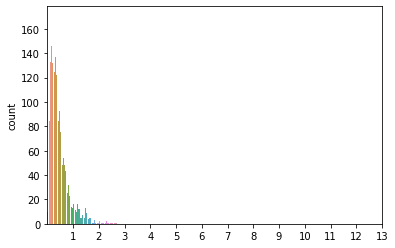

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(sen_len)
plt.xticks(range(200,2800,200))
plt.show

In [ ]:
MAX_LEN = 98

In [ ]:
input_ids = []
for sent in train_text:
  encoded_sent = tokenizer.encode(sent,add_special_tokens=True)
  input_ids.append(encoded_sent)

In [ ]:
print(train_text[0])
print(len(input_ids[0]))

dung  ƒë∆∞·ª£c   s·∫£n ph·∫©m  t·ªët cam on  c·ª≠a h√†ng  ƒë√≥ng g√≥i s·∫£n ph·∫©m r·∫•t ƒë·∫πp v√† ch·∫Øc ch·∫Øn ch·∫•t l∆∞·ª£ng s·∫£n ph·∫©m tuy·ªát v·ªùi
38


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  905


In [ ]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 512 # y√™u c·∫ßu ƒë·∫ßu v√†o c·ªßa pretrained model l√† 512
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Done.


In [ ]:
# Create attention masks
attention_masks = []

for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [ ]:
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, train_label, 
                                                            random_state=2018, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, train_label,
                                             random_state=2018, test_size=0.1)

In [ ]:
# Convert all inputs and labels into torch tensors
import torch
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.
# ƒê√£ th·ª≠ v·ªõi batch size l√† 16 v√† 32 nh∆∞ng ƒë·ªÅu b·ªã CUDA out of memory 

batch_size = 8

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "FPTAI/vibert-base-cased", 
    num_labels = 2, # The number of output labels--2 for binary classification.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(38168, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 2

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
device = 'cuda'

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    model.train()

    # For each batch of training data
    for step, batch in enumerate(train_dataloader):

        #  update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 2 ========
Training...
  Batch    40  of  1,810.    Elapsed: 0:00:18.
  Batch    80  of  1,810.    Elapsed: 0:00:37.
  Batch   120  of  1,810.    Elapsed: 0:00:55.
  Batch   160  of  1,810.    Elapsed: 0:01:13.
  Batch   200  of  1,810.    Elapsed: 0:01:32.
  Batch   240  of  1,810.    Elapsed: 0:01:50.
  Batch   280  of  1,810.    Elapsed: 0:02:08.
  Batch   320  of  1,810.    Elapsed: 0:02:27.
  Batch   360  of  1,810.    Elapsed: 0:02:45.
  Batch   400  of  1,810.    Elapsed: 0:03:03.
  Batch   440  of  1,810.    Elapsed: 0:03:21.
  Batch   480  of  1,810.    Elapsed: 0:03:40.
  Batch   520  of  1,810.    Elapsed: 0:03:58.
  Batch   560  of  1,810.    Elapsed: 0:04:16.
  Batch   600  of  1,810.    Elapsed: 0:04:35.
  Batch   640  of  1,810.    Elapsed: 0:04:53.
  Batch   680  of  1,810.    Elapsed: 0:05:11.
  Batch   720  of  1,810.    Elapsed: 0:05:29.
  Batch   760  of  1,810.    Elapsed: 0:05:48.
  Batch   800  of  1,810.    Elapsed: 0:06:06.
  Batch   840  of